In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import time
import numpy as np
import pandas as pd
import geopandas as gpd
import pickle as pkl
import matplotlib.pyplot as plt

import src
from src.reload import deep_reload

In [2]:
figure_save_path='../sPHEV_Paper/Document/figs/'

In [3]:
df_veh_info=pd.read_excel('vehicles-2023-06-22.xlsx')
df_veh_info=df_veh_info[~np.isnan(df_veh_info['AER Low'])]
df_veh_info.reset_index(inplace=True,drop=True)

aer_low=df_veh_info['AER Low'].to_numpy()
aer_high=df_veh_info['AER High'].to_numpy()

aer=np.zeros(df_veh_info.shape[0])

for idx in range(aer.shape[0]):
    if ~np.isnan(aer_high[idx]):
        aer[idx]=np.mean([aer_low[idx],aer_high[idx]])
    else:
        aer[idx]=aer_low[idx]

df_veh_info['AER']=aer

In [4]:
categories={'sedan':'Sedan/Wagon','suv':'SUV','pickup':'Pickup'}
premium={'economy':'No','luxury':'Yes'}
fuel={'phev':'Plug-in Hybrid Electric','bev':'Electric','hev':'Hybrid Electric'}

In [5]:
info={}

for key0,val0 in categories.items():
    info[key0]={}
    for key1,val1 in premium.items():
        info[key0][key1]={}
        for key2,val2 in fuel.items():
            
            info[key0][key1][key2]=df_veh_info[(
                (df_veh_info['Category']==val0)&
                (df_veh_info['Premium']==val1)&
                (df_veh_info['Fuel']==val2))]

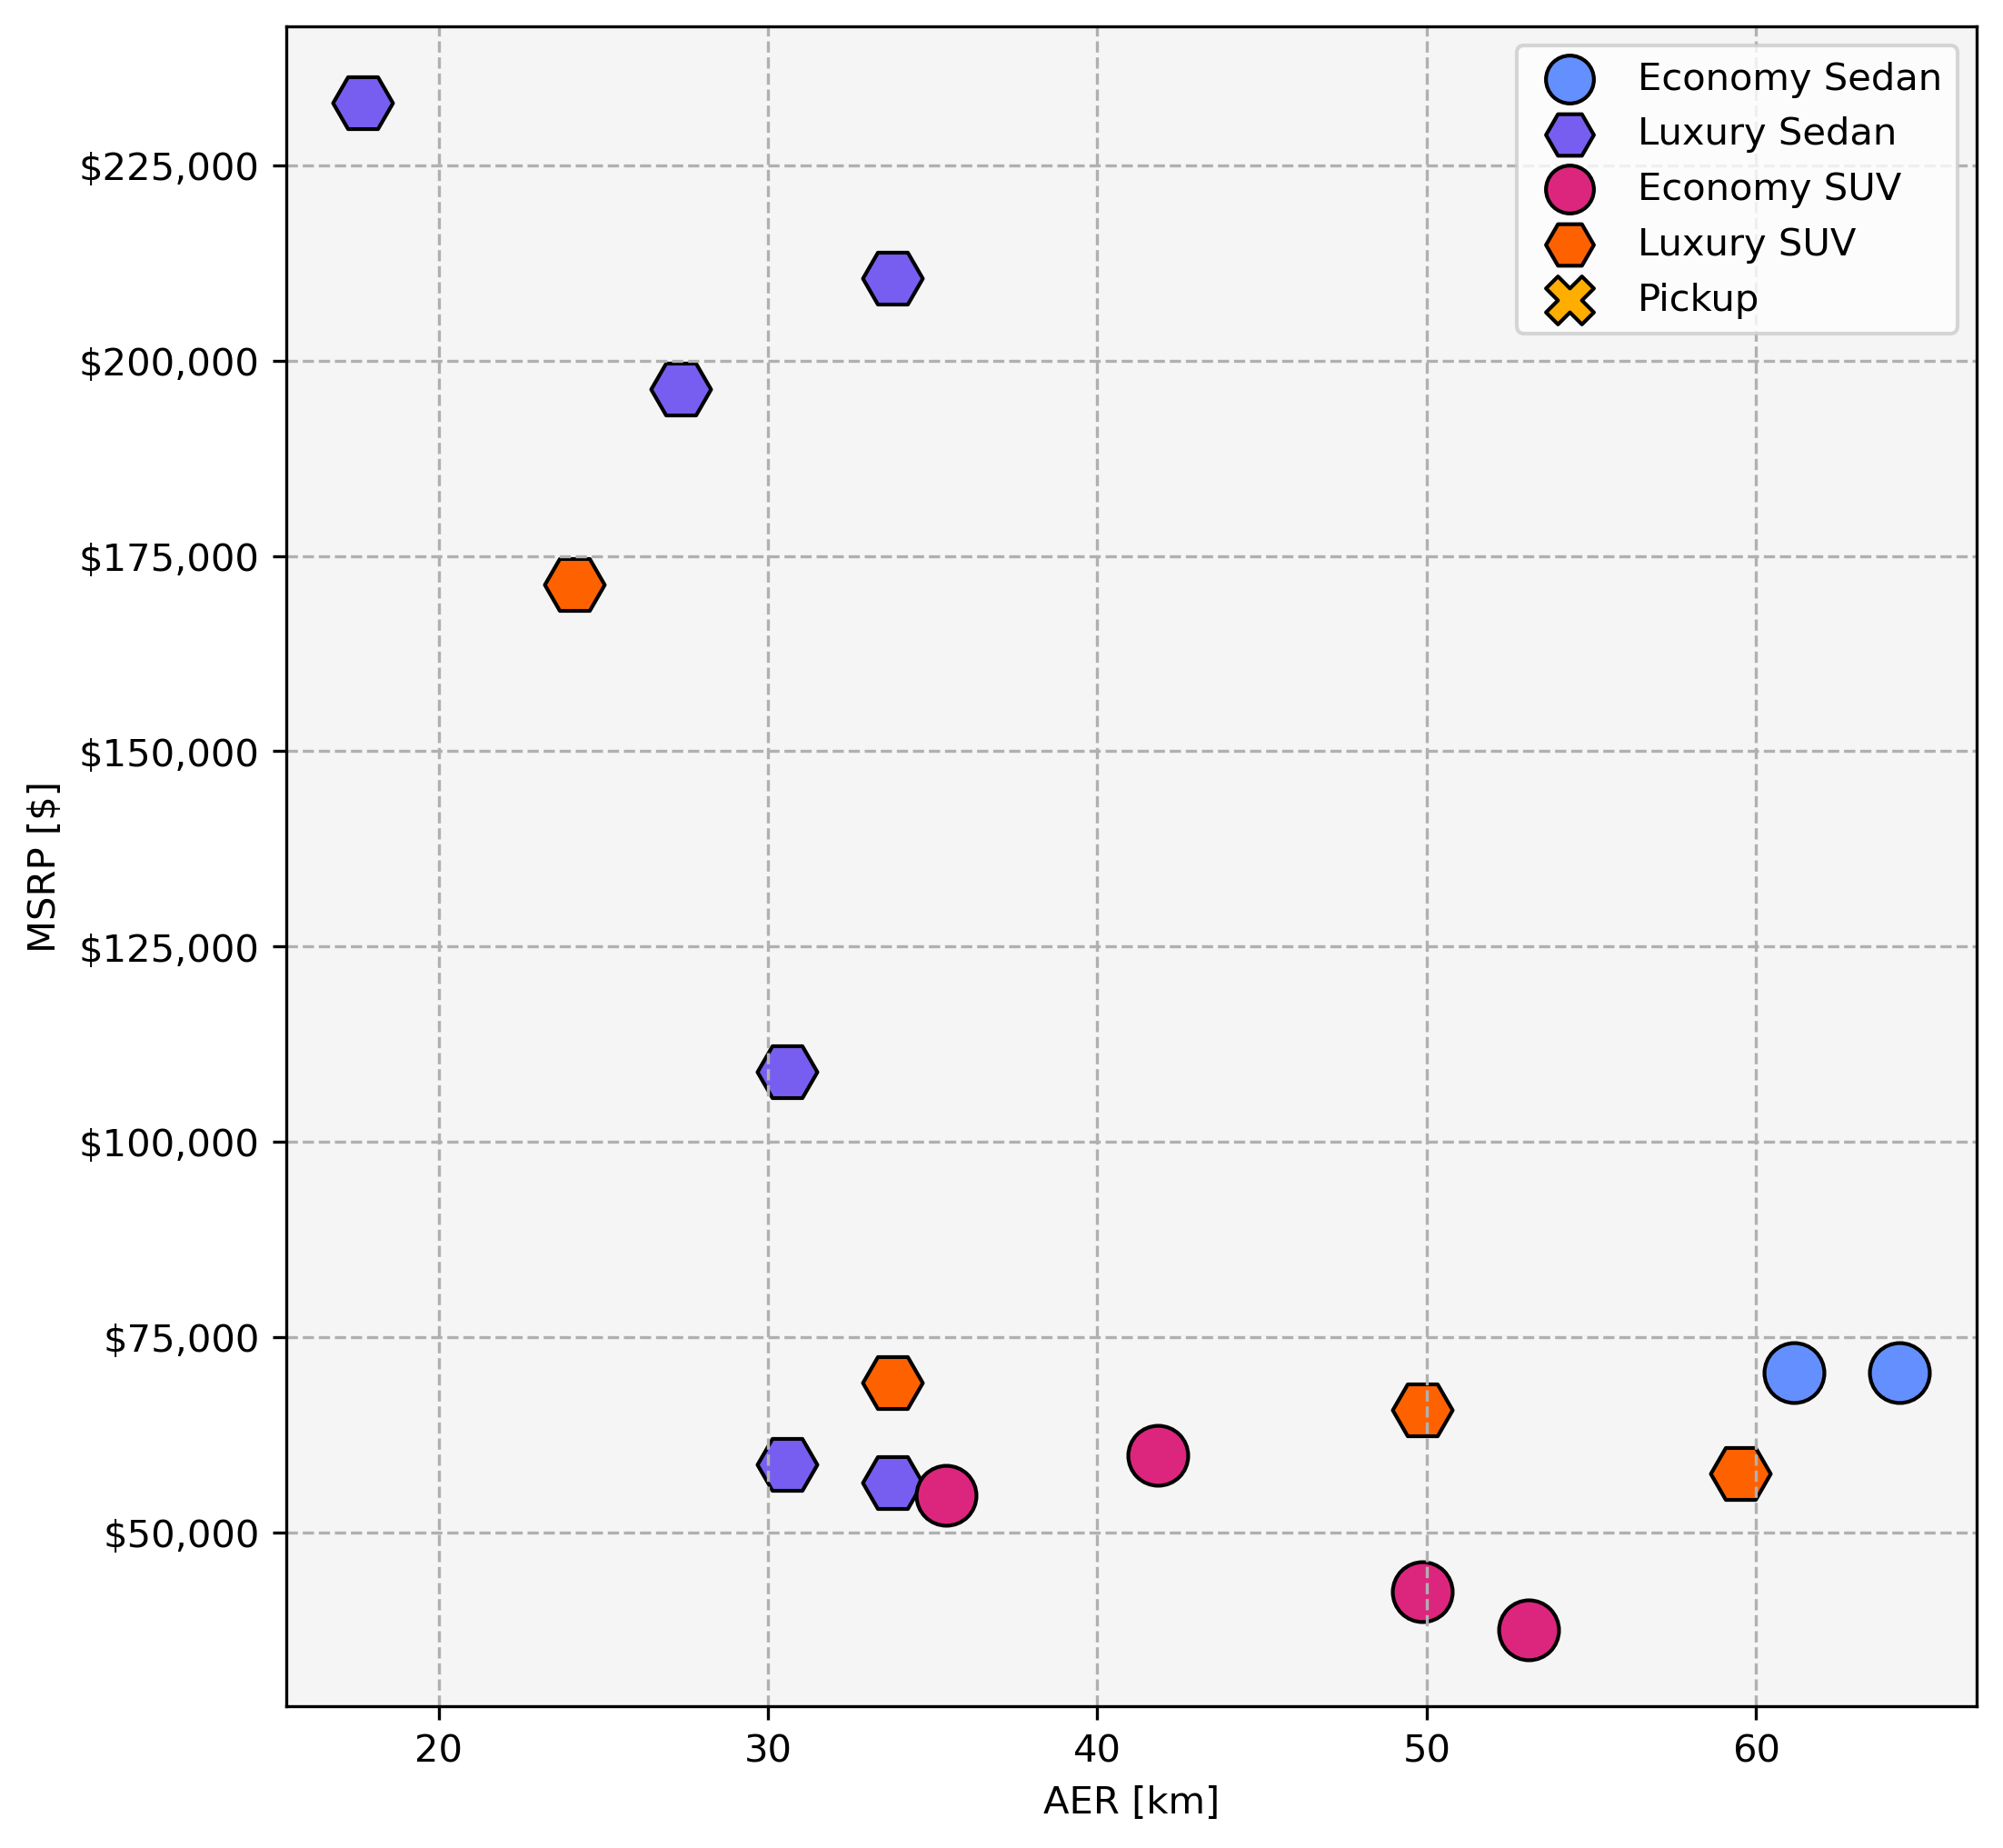

In [104]:
deep_reload(src)
import matplotlib.ticker as mtick

s=250
ec='k'
fontsize=10

plt.rc('font',size=fontsize)
cmap=src.figures.ReturnColorMap(src.figures.colors['ibm'])

fig,ax=plt.subplots(1,1,figsize=(8,8),dpi=300)
if not hasattr(ax,'__iter__'):
    ax=[ax]

dependent='AER'
independent='MSRP'

ax[0].scatter(
    info['sedan']['economy']['phev'][dependent]*1.609,
    info['sedan']['economy']['phev'][independent],
    s=s,marker='o',ec=ec,fc=cmap(0),
    label='Economy Sedan')

ax[0].scatter(
    info['sedan']['luxury']['phev'][dependent]*1.609,
    info['sedan']['luxury']['phev'][independent],
    s=s,marker='H',ec=ec,fc=cmap(.25),
    label='Luxury Sedan')

ax[0].scatter(
    info['suv']['economy']['phev'][dependent]*1.609,
    info['suv']['economy']['phev'][independent],
    s=s,marker='o',ec=ec,fc=cmap(.5),
    label='Economy SUV')

ax[0].scatter(
    info['suv']['luxury']['phev'][dependent]*1.609,
    info['suv']['luxury']['phev'][independent],
    s=s,marker='H',ec=ec,fc=cmap(.75),
    label='Luxury SUV')

ax[0].scatter(
    info['pickup']['economy']['phev'][dependent]*1.609,
    info['pickup']['economy']['phev'][independent],
    s=s,marker='X',ec=ec,fc=cmap(.99),
    label='Pickup')

formatter=mtick.StrMethodFormatter('${x:,.0f}')
ax[0].set_xlabel('AER [km]')
ax[0].yaxis.set_major_formatter(formatter) 
ax[0].set_ylabel('MSRP [$]')

ax[0].grid(ls='--')
ax[0].legend(loc=0,markerscale=.8)
ax[0].set_facecolor('whitesmoke')

fig.savefig(figure_save_path+'MSRP_AER_PHEV.png',bbox_inches='tight')

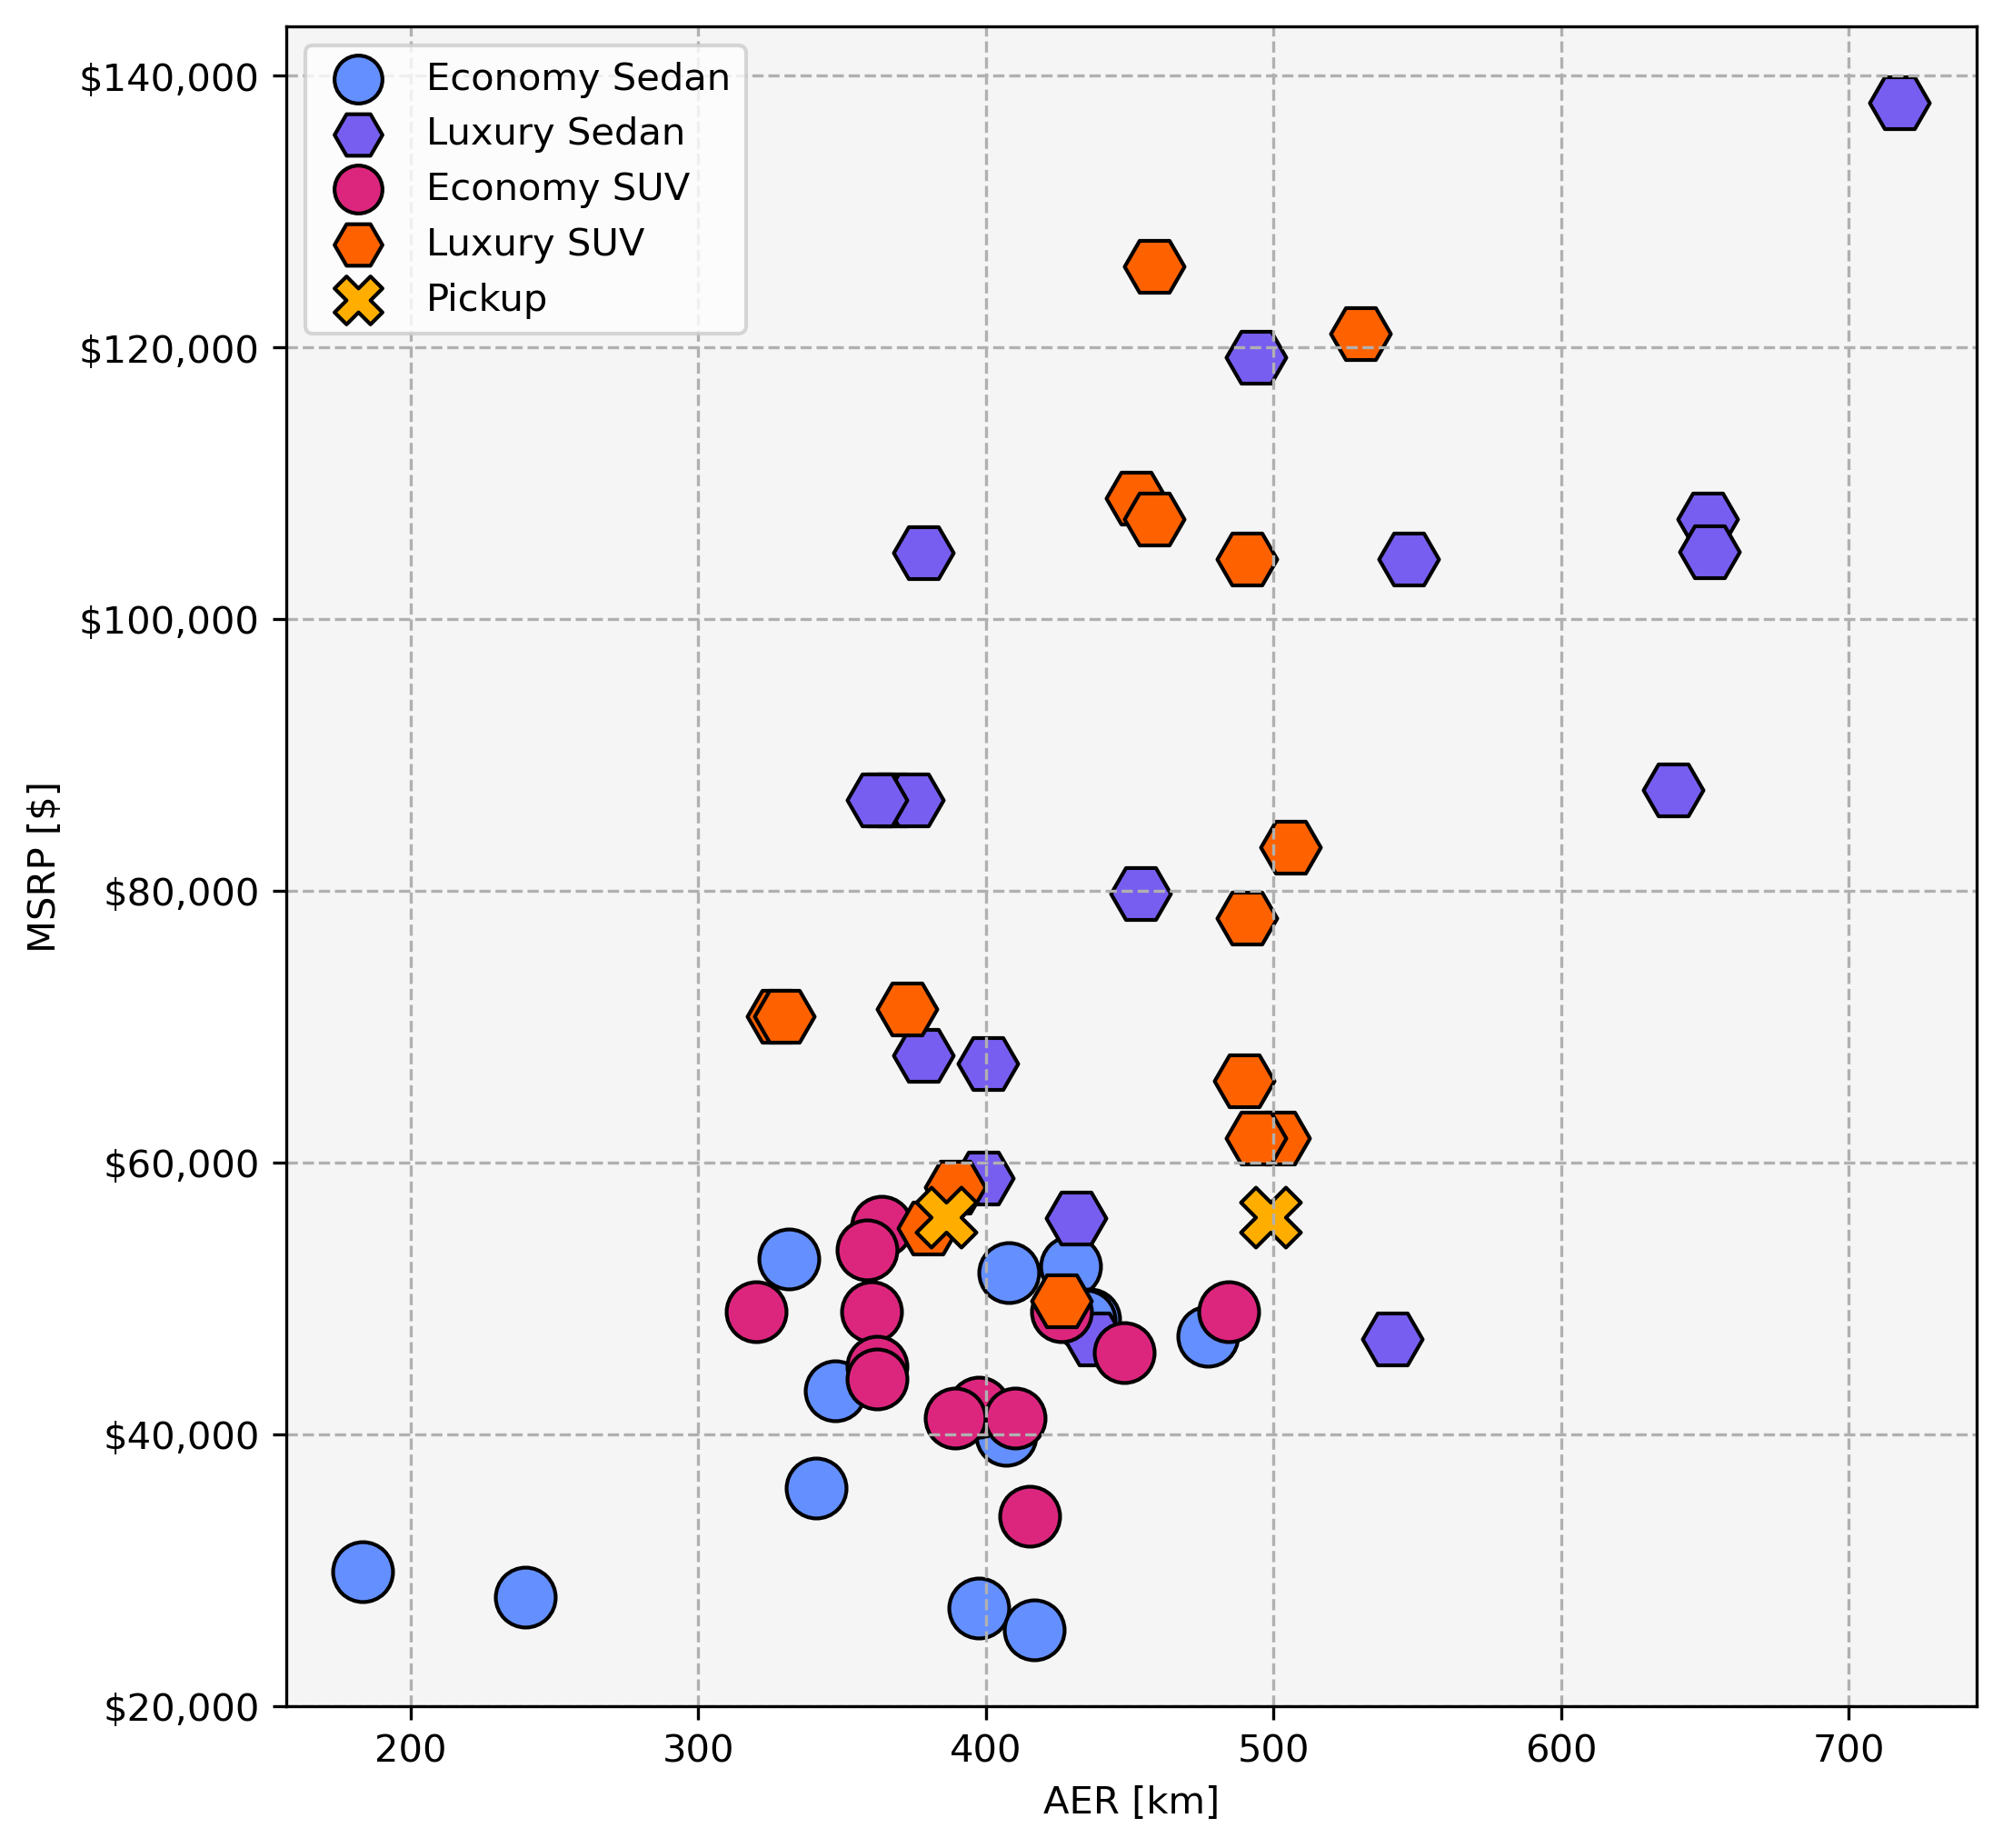

In [103]:
deep_reload(src)
import matplotlib.ticker as mtick

s=250
ec='k'
fontsize=10

plt.rc('font',size=fontsize)
cmap=src.figures.ReturnColorMap(src.figures.colors['ibm'])

fig,ax=plt.subplots(1,1,figsize=(8,8),dpi=300)
if not hasattr(ax,'__iter__'):
    ax=[ax]

dependent='AER'
independent='MSRP'

ax[0].scatter(
    info['sedan']['economy']['bev'][dependent]*1.609,
    info['sedan']['economy']['bev'][independent],
    s=s,marker='o',ec=ec,fc=cmap(0),
    label='Economy Sedan')

ax[0].scatter(
    info['sedan']['luxury']['bev'][dependent]*1.609,
    info['sedan']['luxury']['bev'][independent],
    s=s,marker='H',ec=ec,fc=cmap(.25),
    label='Luxury Sedan')

ax[0].scatter(
    info['suv']['economy']['bev'][dependent]*1.609,
    info['suv']['economy']['bev'][independent],
    s=s,marker='o',ec=ec,fc=cmap(.5),
    label='Economy SUV')

ax[0].scatter(
    info['suv']['luxury']['bev'][dependent]*1.609,
    info['suv']['luxury']['bev'][independent],
    s=s,marker='H',ec=ec,fc=cmap(.75),
    label='Luxury SUV')

ax[0].scatter(
    info['pickup']['economy']['bev'][dependent]*1.609,
    info['pickup']['economy']['bev'][independent],
    s=s,marker='X',ec=ec,fc=cmap(.99),
    label='Pickup')

formatter=mtick.StrMethodFormatter('${x:,.0f}')
ax[0].set_xlabel('AER [km]')
ax[0].yaxis.set_major_formatter(formatter) 
ax[0].set_ylabel('MSRP [$]')

ax[0].grid(ls='--')
ax[0].legend(loc=0,markerscale=.8)
ax[0].set_facecolor('whitesmoke')

fig.savefig(figure_save_path+'MSRP_AER_BEV',bbox_inches='tight')

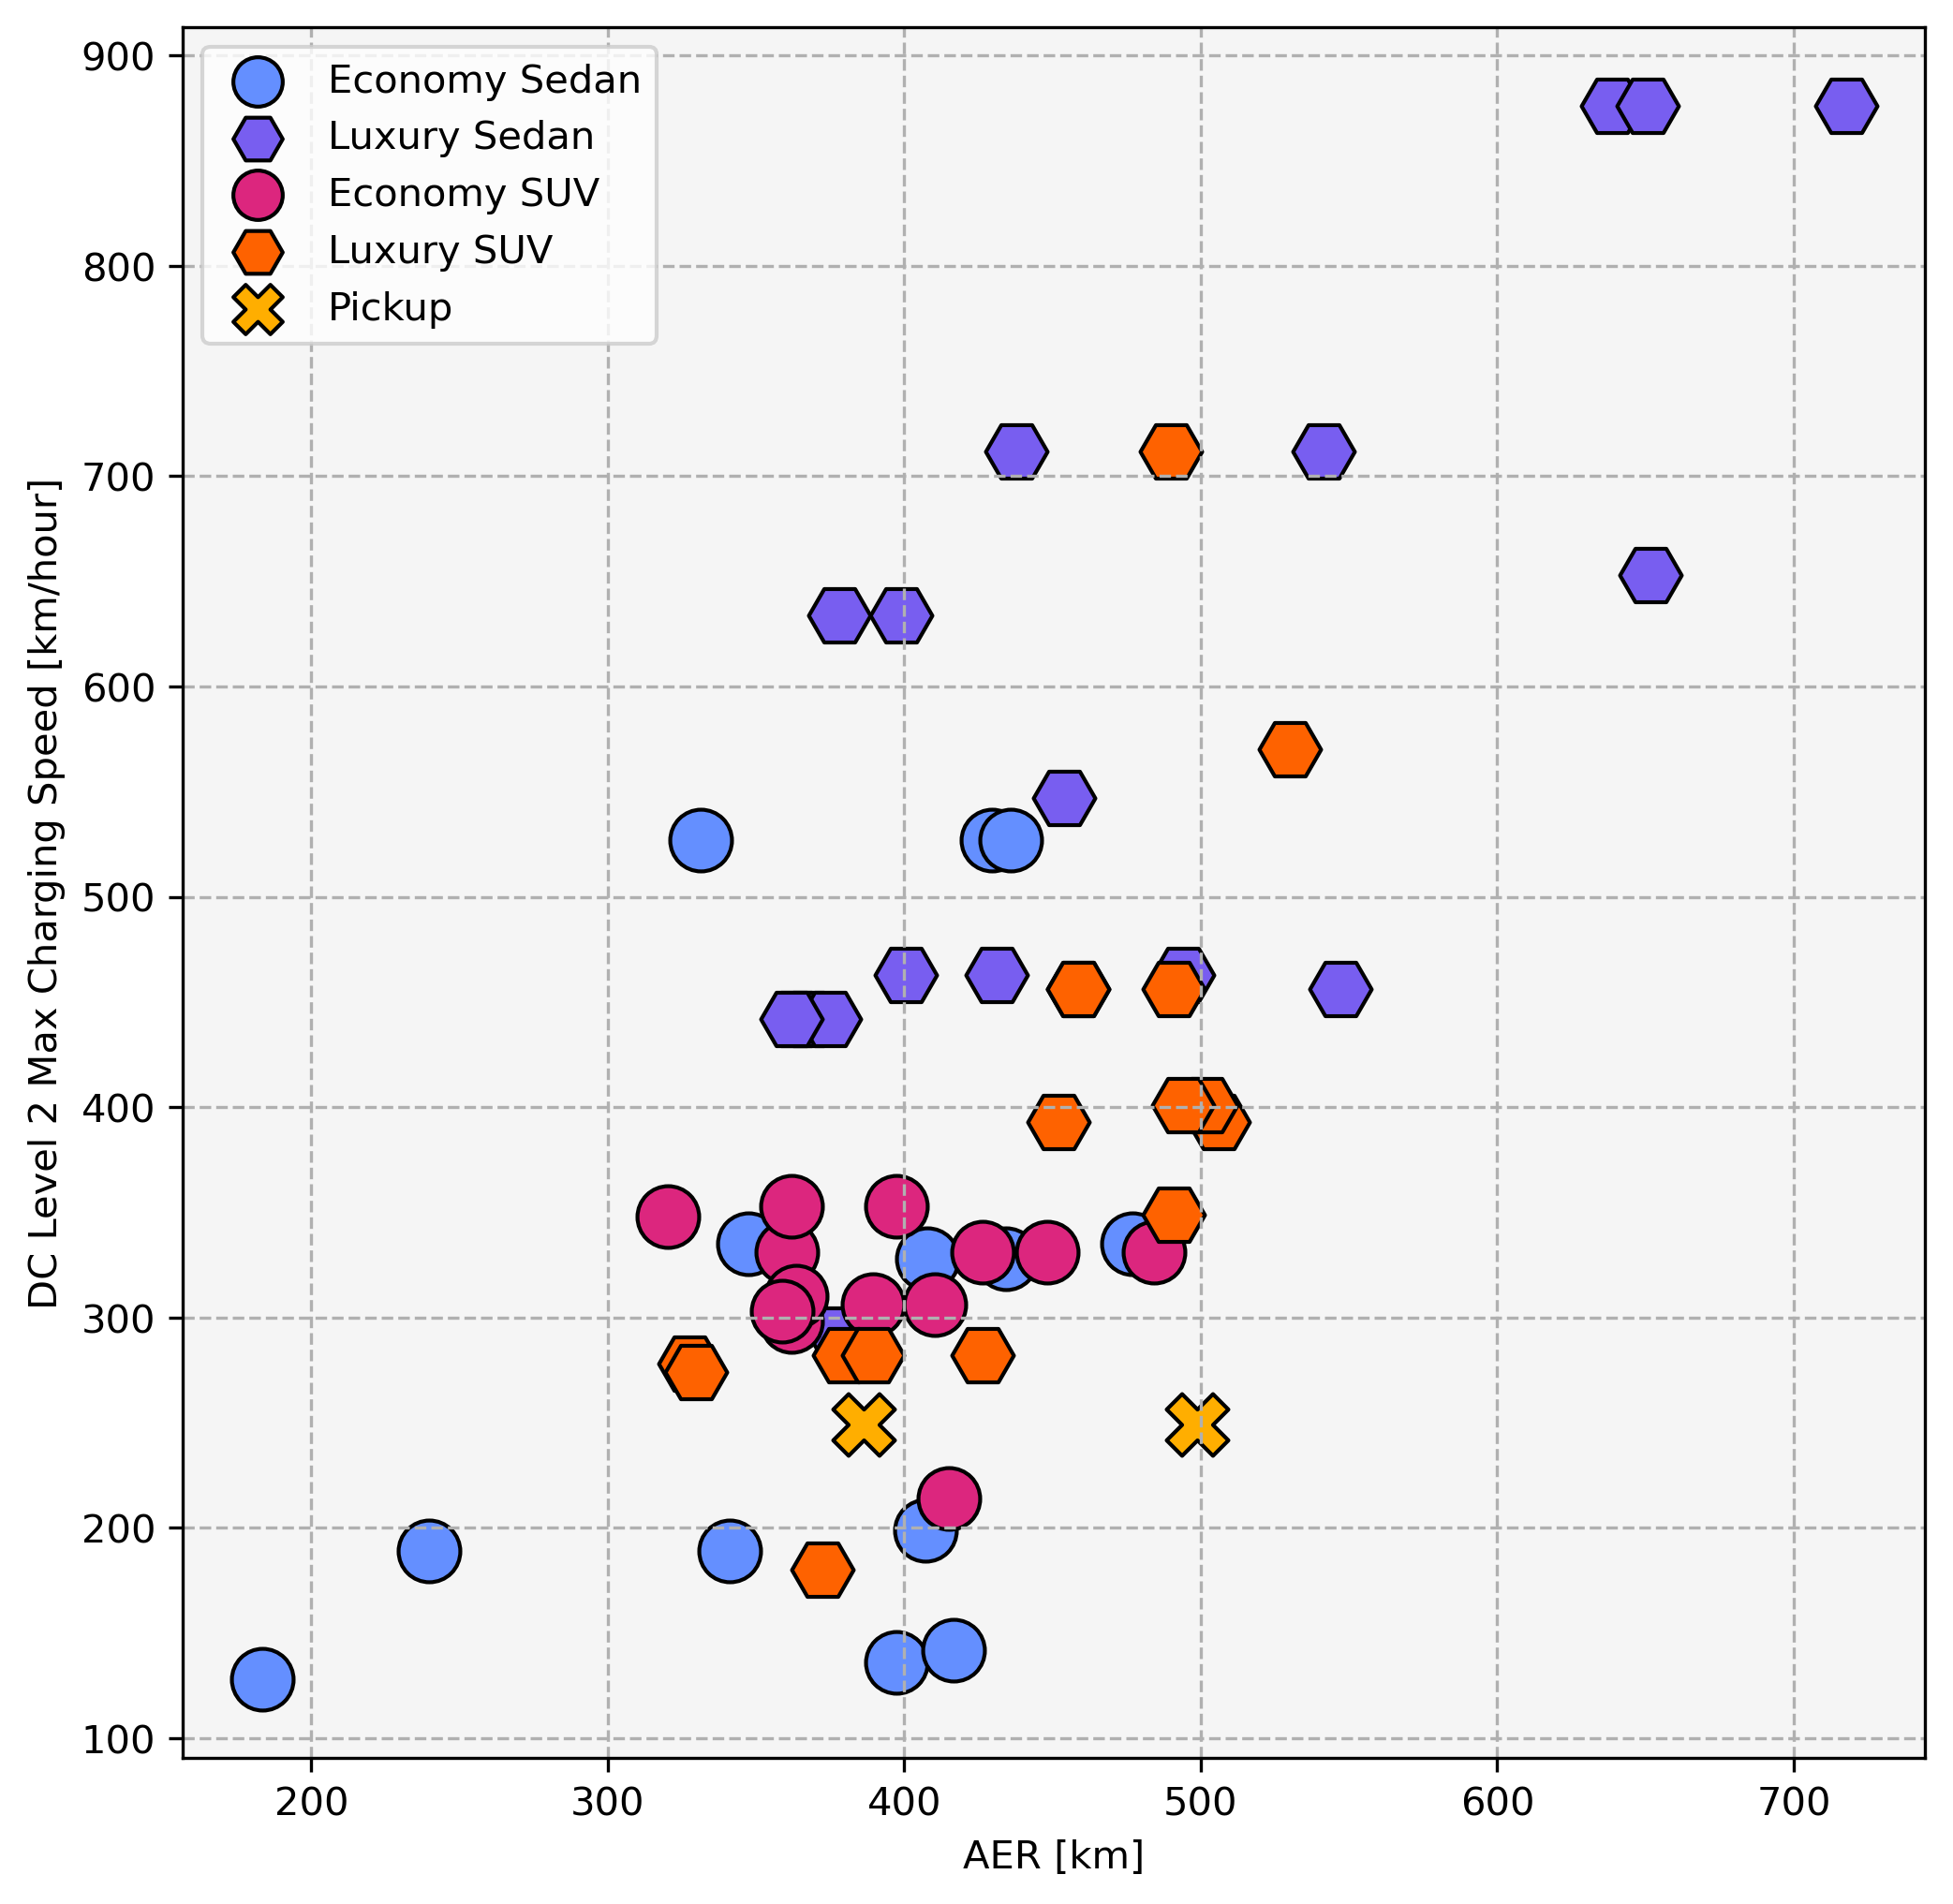

In [102]:
deep_reload(src)
import matplotlib.ticker as mtick

s=250
ec='k'
fontsize=10

plt.rc('font',size=fontsize)
cmap=src.figures.ReturnColorMap(src.figures.colors['ibm'])

fig,ax=plt.subplots(1,1,figsize=(8,8),dpi=300)
if not hasattr(ax,'__iter__'):
    ax=[ax]

dependent='AER'
independent='Charging Speed DC Fast (miles per hour of charging)'

ax[0].scatter(
    info['sedan']['economy']['bev'][dependent]*1.609,
    info['sedan']['economy']['bev'][independent],
    s=s,marker='o',ec=ec,fc=cmap(0),
    label='Economy Sedan')

ax[0].scatter(
    info['sedan']['luxury']['bev'][dependent]*1.609,
    info['sedan']['luxury']['bev'][independent],
    s=s,marker='H',ec=ec,fc=cmap(.25),
    label='Luxury Sedan')

ax[0].scatter(
    info['suv']['economy']['bev'][dependent]*1.609,
    info['suv']['economy']['bev'][independent],
    s=s,marker='o',ec=ec,fc=cmap(.5),
    label='Economy SUV')

ax[0].scatter(
    info['suv']['luxury']['bev'][dependent]*1.609,
    info['suv']['luxury']['bev'][independent],
    s=s,marker='H',ec=ec,fc=cmap(.75),
    label='Luxury SUV')

ax[0].scatter(
    info['pickup']['economy']['bev'][dependent]*1.609,
    info['pickup']['economy']['bev'][independent],
    s=s,marker='X',ec=ec,fc=cmap(.99),
    label='Pickup')

# p=np.polyfit(ind,dep,1)
# x=np.linspace(*ax[0].get_xlim(),100)
# y=p[0]*x+p[1]
# ax[0].plot(x,y,label='Fit')

formatter=mtick.StrMethodFormatter('${x:,.0f}')
ax[0].set_xlabel('AER [km]')
# ax[0].xaxis.set_major_formatter(formatter) 
ax[0].set_ylabel('DC Level 2 Max Charging Speed [km/hour]')

ax[0].grid(ls='--')
ax[0].legend(loc=0,markerscale=.8)
ax[0].set_facecolor('whitesmoke')

fig.savefig(figure_save_path+'MDCS_AER_BEV',bbox_inches='tight')

In [62]:
independent='AER'
dependent='Charging Speed DC Fast (miles per hour of charging)'

dep=np.array(
    info['sedan']['economy']['bev'][dependent].to_list()+
    info['sedan']['luxury']['bev'][dependent].to_list()+
    info['suv']['economy']['bev'][dependent].to_list()+
    info['suv']['luxury']['bev'][dependent].to_list()+
    info['pickup']['economy']['bev'][dependent].to_list())

ind=np.array(
    info['sedan']['economy']['bev'][independent].to_list()+
    info['sedan']['luxury']['bev'][independent].to_list()+
    info['suv']['economy']['bev'][independent].to_list()+
    info['suv']['luxury']['bev'][independent].to_list()+
    info['pickup']['economy']['bev'][independent].to_list())*1.609

dep,ind

(array([136., 142., 527., 527., 527., 199., 128., 335., 335., 189., 189.,
        328., 328., 292., 463., 463., 463., 547., 634., 634., 876., 876.,
        876., 456., 442., 442., 442., 442., 712., 712., 653., 331., 331.,
        331., 331., 214., 298., 353., 353., 348., 306., 306., 310., 303.,
        278., 274., 282., 282., 282., 393., 393., 401., 401., 180., 456.,
        456., 456., 349., 570., 712., 249., 249.]),
 array([397.423 , 416.731 , 331.454 , 429.603 , 436.039 , 407.077 ,
        183.426 , 347.544 , 477.0685, 239.741 , 341.108 , 434.43  ,
        407.8815, 378.115 , 431.212 , 400.641 , 493.963 , 453.738 ,
        399.032 , 378.115 , 717.614 , 638.773 , 650.8405, 547.06  ,
        363.634 , 367.6565, 374.897 , 362.025 , 541.4285, 437.648 ,
        651.645 , 360.416 , 484.309 , 426.385 , 448.1065, 415.122 ,
        362.025 , 397.423 , 362.025 , 320.191 , 410.295 , 389.378 ,
        363.634 , 358.807 , 327.4315, 329.845 , 426.385 , 379.724 ,
        389.378 , 452.129 , 506.03

In [96]:
p=np.polyfit(ind,dep,1,full=True)

In [100]:
.8/p[0][0]*60

36.61837039397408

In [97]:
p

(array([   1.31081748, -155.93902287]),
 array([1028423.69822014]),
 2,
 array([1.40637173, 0.1487231 ]),
 1.3766765505351941e-14)

In [10]:
info['suv']['luxury']['bev'].keys()

Index(['Model Year', 'Premium', 'Manufacturer', 'Model', 'MSRP',
       'Charging Rate DC Fast (kW)', 'Category', 'Fuel', 'AER Low', 'AER High',
       'Seats', 'Alternative Fuel Economy City',
       'Alternative Fuel Economy Highway', 'Alternative Fuel Economy Combined',
       'Conventional Fuel Economy City', 'Conventional Fuel Economy Highway',
       'Conventional Fuel Economy Combined', 'PHEV Type', 'PHEV Total Range',
       'All-Electric Range', 'Charging Rate Level 2 (kW)',
       'Charging Rate DC Fast (kW).1',
       'Charging Speed Level 1 (miles per hour of charging)',
       'Charging Speed Level 2 (miles per hour of charging)',
       'Charging Speed DC Fast (miles per hour of charging)',
       'Battery Capacity (kWh)', 'Transmission Type', 'Transmission Make',
       'Engine Type', 'Engine Size', 'Engine Cylinder Count',
       'Number of Passengers', 'Heavy-Duty Power System', 'Drivetrain',
       'Notes', 'AER'],
      dtype='object')